In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame([[2,3,4,6,4,40,5],[5,7,9,13,9,81,11]]).T
df.columns = ['Km rodados','Valor cobrado']
display(df)

,Km rodados,Valor cobrado
0,2,5
1,3,7
2,4,9
3,6,13
4,4,9
5,40,81
6,5,11


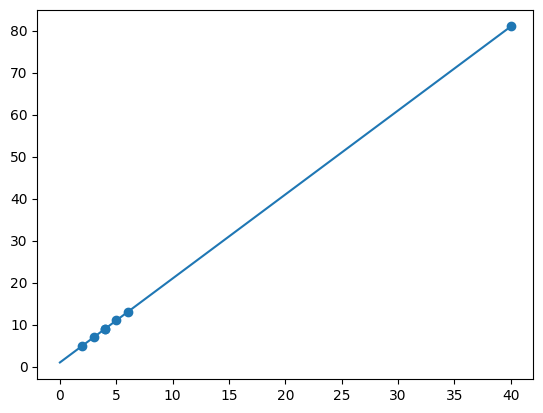

In [3]:
plt.scatter(df['Km rodados'], df['Valor cobrado'])
x = []
y = []
for i in range(41):
    x.append(i)
    y.append((2*i)+1)
plt.plot(x,y)

In [4]:
display(df['Valor cobrado'].mean())
display(df['Km rodados'].mean())

19.285714285714285

9.142857142857142

In [5]:
#Define as bases de treino. Usei os 5 primeiros exemplos pra criar a equação. Os dois últimos vou usar pra testar a equação.
X_train = df[['Km rodados']].iloc[:5]
y_train = df['Valor cobrado'].iloc[:5]
#Cria a equação
reg = LinearRegression()
reg.fit(X_train, y_train)
#Mostra a primeira parte da equação, o que seria o nosso 2x
display(reg.coef_)
#Mostra a segunda parte da equação, o que seria o nosso 1. Ele cria como 0.99999999999, por conta da forma como os cálculos sao feitos, mas eu aproximei pra 1.
#Você vai ver que na hora de calcula ele aproxima também.
display(round(reg.intercept_))
X_test = df[['Km rodados']].iloc[5:]
y_test = df['Valor cobrado'].iloc[5:]

array([2.])

1

In [6]:
#Uso a equação criada pra testar a equação. Por isso, pego os dois últimos exemplos da base
valores_preditos = pd.DataFrame(reg.predict(df[['Km rodados']].iloc[5:])).reset_index(drop=True)
#Crio uma estrutura com os dados reais, que são aqueles da base original, pra ver se a equação realmente acertou os exemplos.
X_test = df[['Km rodados']].iloc[5:].reset_index(drop=True)
y_test = df['Valor cobrado'].iloc[5:].reset_index(drop=True)
valores_reais = y_test
#Boto os dois na mesma estrutura pra comparar.
df_resultados = pd.concat([valores_preditos, valores_reais ], axis = 1)
df_resultados.columns = ['Valor predito','Valor real']
#Veja que os resultados estão iguais.
display(df_resultados)

,Valor predito,Valor real
0,81.0,81
1,11.0,11
